In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

In [4]:
train_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
val_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

In [5]:
image_classes = os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/train')
print(image_classes)

['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato', 'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage', 'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato']


In [6]:
def plot_images(image_classes):
    plt.figure(figsize = (8,8))
    for i, category in enumerate(image_classes):
        image_path = train_path + "/" + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + "/" + first_image
        
        #load image
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

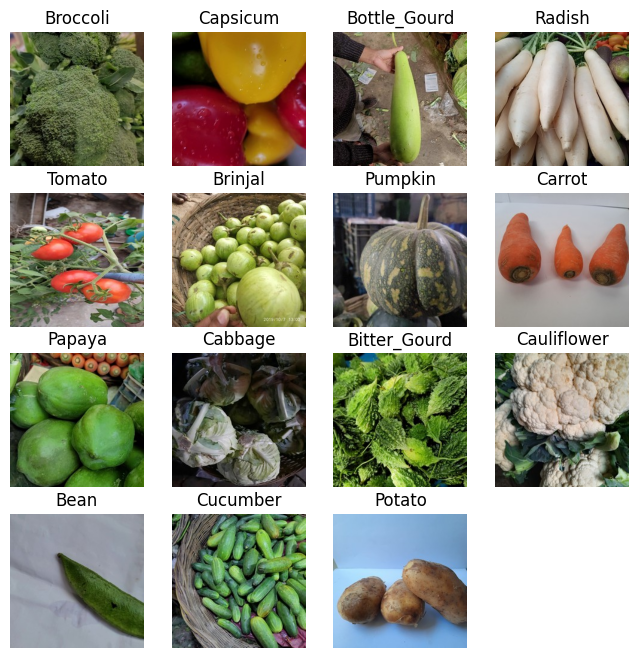

In [7]:
plot_images(image_classes)

In [8]:
data_gen = ImageDataGenerator (rescale = 1/ 255)

In [9]:
train_data = data_gen.flow_from_directory(train_path,
                                         target_size = (150,150),
                                         batch_size = 32)

Found 15000 images belonging to 15 classes.


In [10]:
test_data = data_gen.flow_from_directory(test_path,
                                        target_size = (150,150),
                                        batch_size = 32)

Found 3000 images belonging to 15 classes.


In [11]:
val_data = data_gen.flow_from_directory(val_path,
                                       target_size = (150,150),
                                       batch_size = 32)

Found 3000 images belonging to 15 classes.


In [12]:
#Model Build
model = Sequential()
#Input Layer
model.add(Conv2D(32, kernel_size = 3, padding ='same', activation ='relu',
                input_shape = [150,150,3]))
#MaxPooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Hidden Layer
model.add(Conv2D(32, kernel_size = 3, padding ='same', activation ='relu'))
#MaxPooling Layer
model.add(MaxPooling2D())

#Flatten Layer
model.add(Flatten())

#Fully connected Layer
model.add(Dense(128, activation = 'relu'))
#Fully connected Layer
model.add(Dense(128, activation = 'relu'))

#Output Layer
model.add(Dense(15, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,607,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,636,143 (21.50 MB)

 Trainable params: 5,636,143 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
model_hist = model.fit(train_data, epochs = 10, validation_data = val_data)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-22 18:07:06.861839: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.49652, expected 3.54228
2024-08-22 18:07:06.861896: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.92606, expected 4.97181
2024-08-22 18:07:06.861910: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.81105, expected 4.8568
2024-08-22 18:07:06.861936: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.45505, expected 4.50081
2024-08-22 18:07:06.861951: E external/local_xla/xla/service/gpu/buffer_comparator.cc:113

  1/469 ━━━━━━━━━━━━━━━━━━━━ 55:37 7s/step - accuracy: 0.1562 - loss: 2.6932

I0000 00:00:1724350029.772011     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


226/469 ━━━━━━━━━━━━━━━━━━━━ 45s 188ms/step - accuracy: 0.2922 - loss: 2.5186

2024-08-22 18:07:52.642740: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67500: 2.86747, expected 2.36051
2024-08-22 18:07:52.642800: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67511: 3.36941, expected 2.86245
2024-08-22 18:07:52.642817: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67530: 3.78087, expected 3.27391
2024-08-22 18:07:52.642830: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67531: 3.52473, expected 3.01778
2024-08-22 18:07:52.642840: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67532: 3.23333, expected 2.72638
2024-08-22 18:07:52.642851: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67554: 3.96573, expected 3.45878
2024-08-22 18:07:52.642862: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67555: 3.94743, expected 3.44047
2024-08-22 18:07:52.642872:

469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 229ms/step - accuracy: 0.4061 - loss: 2.0168 - val_accuracy: 0.7230 - val_loss: 0.8509
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8132 - loss: 0.5811 - val_accuracy: 0.8530 - val_loss: 0.4678
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.8974 - loss: 0.3238 - val_accuracy: 0.8770 - val_loss: 0.4343
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9363 - loss: 0.2030 - val_accuracy: 0.8690 - val_loss: 0.4957
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9465 - loss: 0.1851 - val_accuracy: 0.8597 - val_loss: 0.4972
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9475 - loss: 0.1654 - val_accuracy: 0.8877 - val_loss: 0.4674
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step - accuracy: 0.9698 - loss: 0.0937 - val_accuracy: 0.8317 - val_loss: 0.7825
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9517 - loss: 0.1835 - val_accur

In [16]:
model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.9071 - loss: 0.5266


[0.5791817307472229, 0.9020000100135803]

In [17]:
model.evaluate(train_data)

469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9758 - loss: 0.0908


[0.09284232556819916, 0.977066695690155]

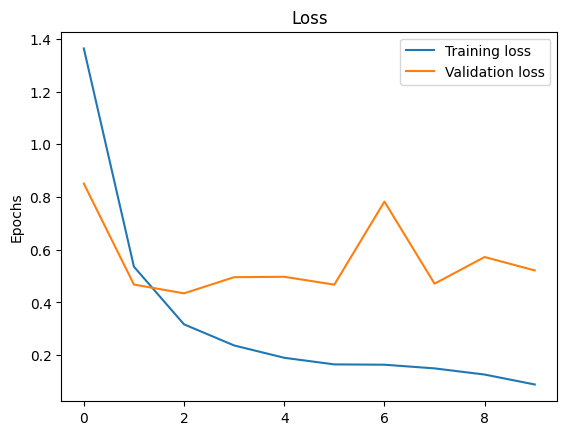

In [18]:
plt.plot(model_hist.history['loss'], label = 'Training loss')
plt.plot(model_hist.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.title('Loss')
plt.ylabel('Epochs')
plt.show()

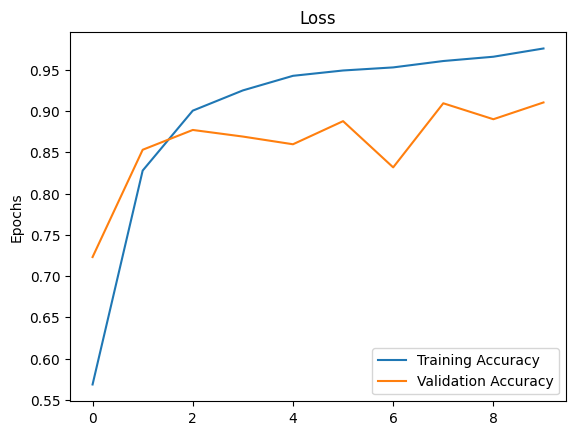

In [19]:
plt.plot(model_hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(model_hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Loss')
plt.ylabel('Epochs')
plt.show()

In [20]:
model.save('Veg_model.h5')